# Задание 1

Для начала давайте проанализируем, насколько быстро растёт аудитория нашего сервиса, и посмотрим на динамику числа пользователей и курьеров. 

Задание:

Для каждого дня, представленного в таблицах user_actions и courier_actions, рассчитайте следующие показатели:

1. Число новых пользователей.
2. Число новых курьеров.
3. Общее число пользователей на текущий день.
4. Общее число курьеров на текущий день.
Колонки с показателями назовите соответственно new_users, new_couriers, total_users, total_couriers. Колонку с датами назовите date. Проследите за тем, чтобы показатели были выражены целыми числами. Результат должен быть отсортирован по возрастанию даты.

Поля в результирующей таблице: date, new_users, new_couriers, total_users, total_couriers

```sql
with new_us AS (
  SELECT
    ua.time :: date AS date,
    count(distinct ua.user_id) AS new_users
  FROM
    user_actions ua
  WHERE
    (ua.time :: date, ua.user_id) in (
      SELECT
        min(time :: date),
        user_id
      FROM
        user_actions
      GROUP BY
        user_id
    )
  GROUP BY
    1
),
new_cour AS (
  SELECT
    ca.time :: date AS date,
    count(distinct ca.courier_id) AS new_couriers
  FROM
    courier_actions ca
  WHERE
    (ca.time :: date, ca.courier_id) in (
      SELECT
        min(time :: date),
        courier_id
      FROM
        courier_actions
      GROUP BY
        courier_id
    )
  GROUP BY
    1
)
SELECT
  *,
  (
    SUM(new_users) OVER(
      ORDER BY
        date
    )
  ) :: int AS total_users,
  (
    SUM(new_couriers) OVER(
      ORDER BY
        date
    )
  ) :: int AS total_couriers
FROM
  new_us
  JOIN new_cour using (date)
ORDER BY
  date
```

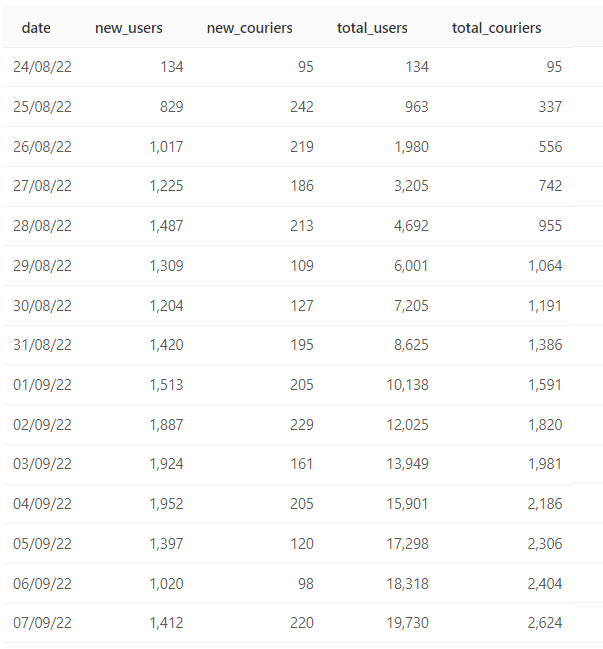

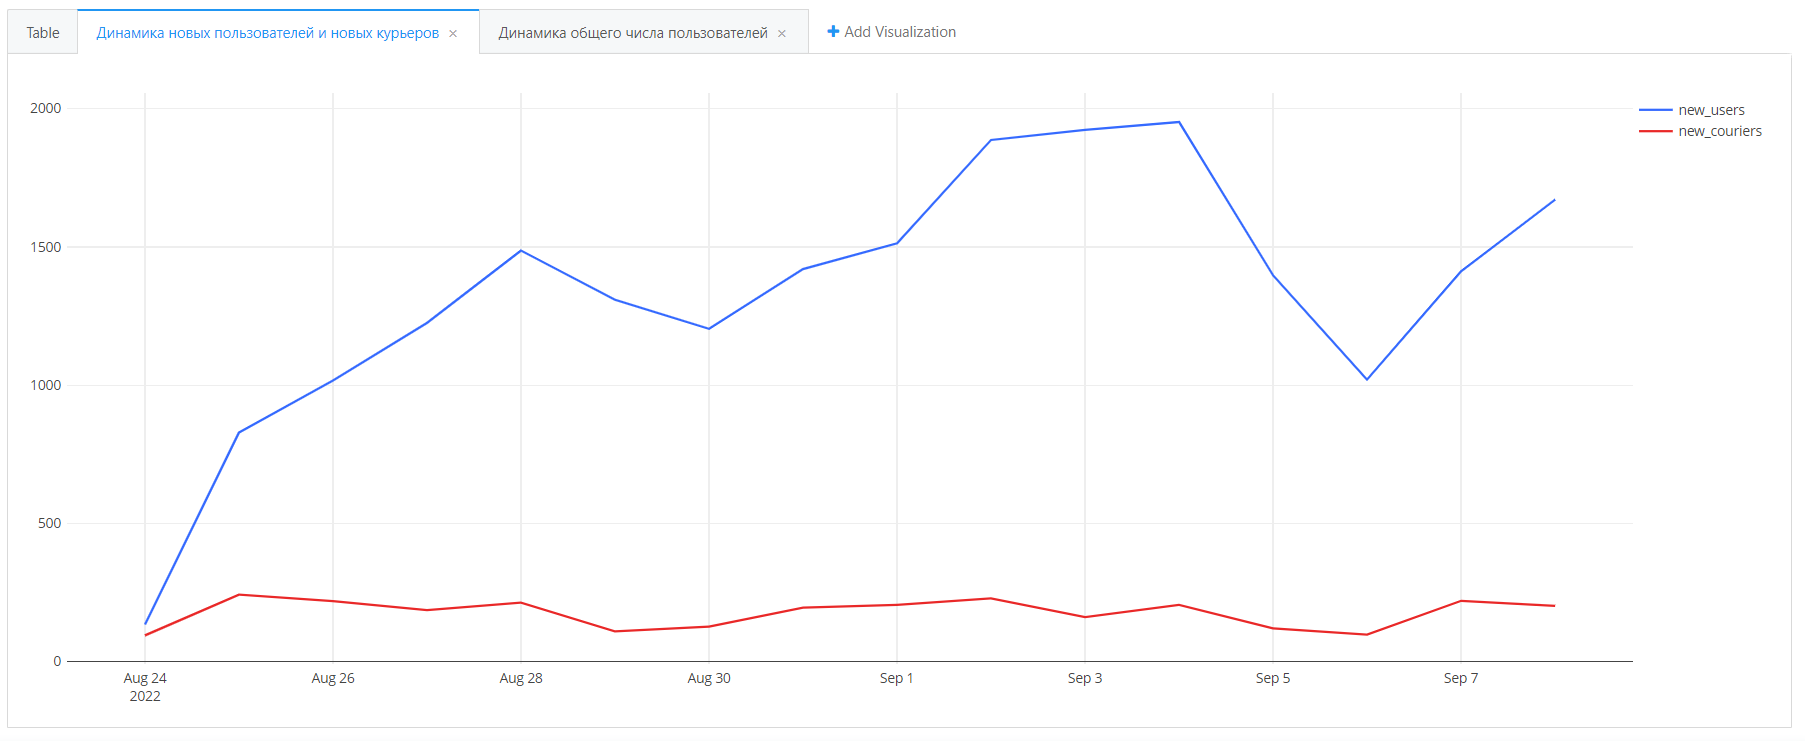

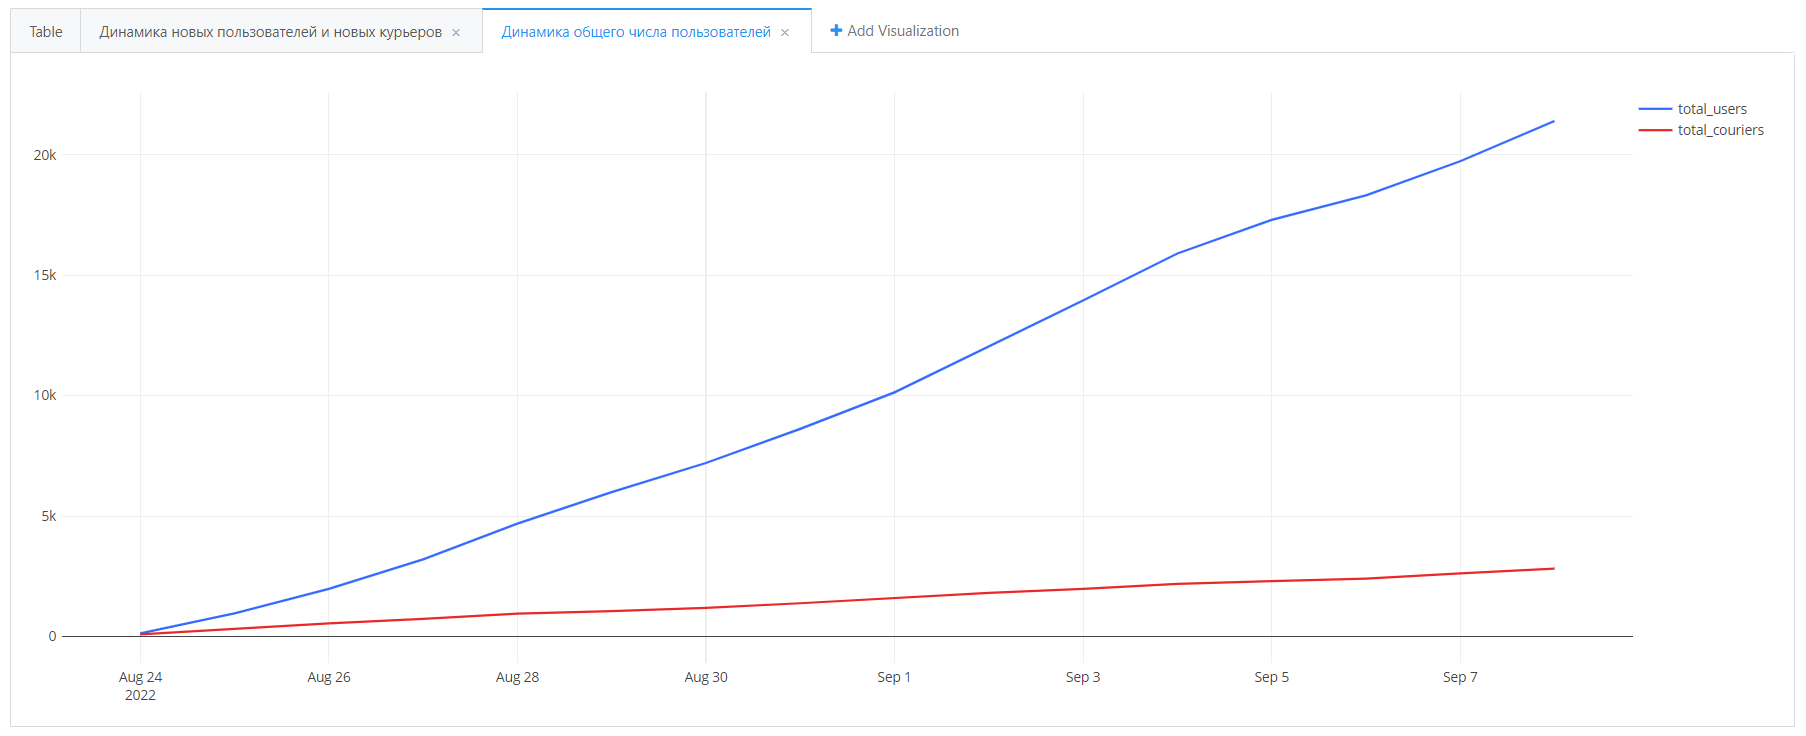